# Plot

This notebook plots the distribution of differences in mean ranks using 8 template experiments

*Note: There were 10 template experiments but for one of the experiments DESeq didn't successfully run due to the distribution of data between samples being too similar

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
mean_diff_sophie = [
    11.45999999999998,
    63.17999999999995,
    -38.05000000000007,
    -180.85000000000002,
    -20.860000000000014,
    52.52000000000004,
    47.93000000000001,
    -74.08000000000004,
]

In [3]:
mean_diff_trad = [
    -140.90999999999997,
    -34.6400000000001,
    -128.58000000000004,
    61.35000000000002,
    -125.88,
    -62.710000000000036,
    -262.26000000000005,
    -169.8,
]

In [4]:
"""mean_diff_sophie = [
    -11.45999999999998,
    -63.18000000000001,
    38.05000000000001,
    180.85000000000002,
    20.8599999999999,
    -16.639999999999986,
    -52.52000000000004,
    -47.930000000000064,
    74.08000000000004,
]"""

'mean_diff_sophie = [\n    -11.45999999999998,\n    -63.18000000000001,\n    38.05000000000001,\n    180.85000000000002,\n    20.8599999999999,\n    -16.639999999999986,\n    -52.52000000000004,\n    -47.930000000000064,\n    74.08000000000004,\n]'

In [5]:
"""mean_diff_trad = [
    140.91000000000003,
    34.639999999999986,
    128.57999999999998,
    -61.349999999999966,
    125.88,
    -33.610000000000014,
    62.710000000000036,
    262.25999999999993,
    169.8,
]"""

'mean_diff_trad = [\n    140.91000000000003,\n    34.639999999999986,\n    128.57999999999998,\n    -61.349999999999966,\n    125.88,\n    -33.610000000000014,\n    62.710000000000036,\n    262.25999999999993,\n    169.8,\n]'

In [6]:
# Make dataframe
mean_diff = pd.DataFrame(
    data={"sophie rank diff": mean_diff_sophie, "traditional rank diff": mean_diff_trad}
)

In [7]:
mean_diff

,sophie rank diff,traditional rank diff
0,11.46,-140.91
1,63.18,-34.64
2,-38.05,-128.58
3,-180.85,61.35
4,-20.86,-125.88
5,52.52,-62.71
6,47.93,-262.26
7,-74.08,-169.80


In [8]:
# Melt dataframe to use coloring in boxplot
mean_diff_melt = pd.melt(mean_diff)

Text(0.5, 1.0, 'Mean rank difference between specific vs common DEGs')

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


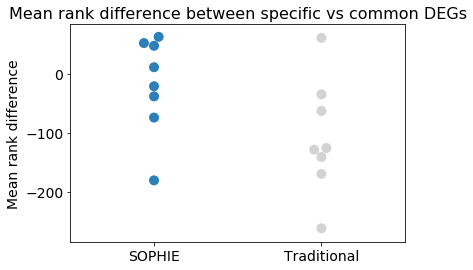

In [9]:
# Plot coverage distribution given list of generic coverage, specific coverage
fig = sns.swarmplot(
    data=mean_diff_melt,
    x="variable",
    y="value",
    # notch=True,
    palette=["#2c7fb8", "lightgrey"],
    size=10,
)
fig.set_xlabel(None)
fig.set_xticklabels(["SOPHIE", "Traditional"], fontsize=14, fontname="Verdana")
fig.set_ylabel("Mean rank difference", fontsize=14, fontname="Verdana")
fig.tick_params(labelsize=14)
fig.set_title(
    "Mean rank difference between specific vs common DEGs",
    fontsize=16,
    fontname="Verdana",
)